# Season 3 - Script Analysis

![SegmentLocal](../Images/6.jpg "poster")

![SegmentLocal](../Images/5.gif "GIF")

In [11]:
import os      
import pandas as pd
import plotly.graph_objects as go
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
folder = "../Data/Scripts/Season 3/"
txt_files = os.listdir(folder)   
print(txt_files)

['03x01 - Opening Night.txt', '03x02 - The Throuple.txt', '03x03 - New Car.txt', '03x04 - Driving Test.txt', '03x05 - Rooms by the Hour.txt', '03x06 - Murder Mystery.txt', '03x07 - General Store.txt', '03x08 - Bad Review.txt', '03x09 - The Affair.txt', '03x10 - Sebastien Raine.txt', '03x11 - Stop Saying Lice!.txt', '03x12 - Friends & Family.txt', '03x13 - Grad Night.txt']


In [3]:
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[0])

(Birds chirp) Moira: David, this isn't funny! I have my first Town Hall meeting in an hour, where is my portfolio?! Uh, why... why would I know where your portfolio is? You were bedazzling it last night. Excuse me? I haven't bedazzled anything since I was 22. David, you were dressed like a harlequin, and you were gluing shiny jewels... perhaps that was just a night terror. Um... oh God. Okay. Oh. Well! Uh... (Gasps) Hello. Hi, uh, I'm-I'm Jake. Oh, of course you are. (They chuckle) David? Um, Jake, this is my mother. Listen, I'm really sorry, I didn't think anybody would be home. Okay, nobody was supposed to be home. Nobody was supposed to be home, so... You were supposed to be at lunch, why-why are-why were you not at lunch?! David, stop acting like a disgruntled pelican! I came home from lunch because I realized I misplaced my portfolio. ... folio. So we're-I'm gonna... we're gonna look for it. Johnny: David, Oh my God! we're looking for your mother's portfol... Oh. Oh! Okay. Hello, 

In [4]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/schitts-creek.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: 03x01 - Opening Night
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 03x02 - The Throuple
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 03x03 - New Car
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 03x04 - Driving Test
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: 03x05 - Rooms by the Hour
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 03x06 - Murder Mystery
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 03x07 - General Store
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 03x08 - Bad Review
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: 03x09 - The Affair
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 03x10 - Sebastien Raine
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 03x11 - Stop Saying Lice!
Sentiment Prediction: 0.0, Sentiment Analysis

In [5]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in 03x01 - Opening Night Letter
['Mutt', 'Alexis', 'one', 'guys', 'Johnny Rose', 'Sighs) John', 'Johnny: David', 'mother', 'Jake', 'Bob', 'John Rose', 'mother', 'Moira: David', 'nobody', 'Nobody', 'each other', 'nobody', 'Moira: Well', 'Nobody', 'Nobody', 'people', 'mother', 'anybody', 'Parents', 'Um David', 'one', 'child', 'Dad', 'boys', 'son', 'juice fan', 'people', 'father', 'God', 'clients', 'father', 'constituents', 'chair', 'Mhmm', 'somebody', 'children', 'someone', 'guy', 'client', 'people', 'people', 'people', 'children', 'children', 'someone', 'everybody', 'Daycare Worker', 'everyone', 'everyone', 'everyone', 'kids', 'kids', 'each other', 'each other', 'man', 'audience', 'community', 'Johnnymichael', 'man', 'families', 'parents', 'guys', 'people', 'manicurist', 'communities', 'politician', 'toddlers', 'one', 'family', 'Bell', 'people', 'anyone', 'Amy', 'Children', 'babe', 'guard', 'friends', 'kids', 'family', 'family', 'kids', 'no one', 'father', 'Amygrac

Person Entities Named in 03x06 - Murder Mystery Letter
['Jocelyn', 'murderer', 'Stevie', 'David', 'Twyla', 'Jocelyn...', 'John', 'Ted', 'mom', 'mailman', 'murderer', 'Rose', 'murderer', 'friends', 'everybody', 'somebody', 'someone', 'everyone', 'people', 'Johnny', 'anyone', 'Jazzigals', 'guys', 'people', 'Moira', 'Rose', 'people', 'guests', 'people', 'no one', 'someone', 'No one', 'no one', 'no one', 'counsel', 'Budd', 'kids', 'anyone', 'murderers', 'murderer', 'friend', 'everybody', 'Alexis', 'both', 'ex-boyfriend', 'celebrities', 'assistant', 'one', 'people', 'mayor', 'ex-boyfriends', 'secretary', 'everybody', 'tush', 'man', 'mayor', 'marquee guest', 'marquee guests', 'creative director', 'friends', 'taste-maker', 'anyone', 'starter', 'Jazzigals', 'everyone', 'everybody', 'Bam', 'dew-dropper', 'Jonathan', 'couple', 'golfers', 'golfer', 'each other', 'Jess Chang', 'Managers', 'guys', 'R', 'Mhmm', 'Beyonce']

Number Entities Named in 03x06 - Murder Mystery Letter
['one', 'one', 'one', 

Person Entities Named in 03x10 - Sebastien Raine Letter
['Sebastien Raine', 'girlfriend', 'David', 'people', 'Bob', 'Madonna', 'Family', 'Gwen', 'Moira', 'Ted', 'Dot', 'friend', 'Johnny', 'people', 'Everybody', 'friends', 'Schnabel', 'Stevie', 'girls', 'one', 'ladies', 'mother', 'someone', 'landlord', 'dance partner', 'Sebastian', 'ladies', 'one', 'Everyone', 'women', 'picturettes', 'seniors', 'Mother', 'Umm', 'ladies', 'mother', 'Sanka-ccino', 'Joan', 'Chattin', 'Alexis', 'granddaughter', 'folks', 'everyone', 'Carol', 'Ray', 'someone', 'Ronnie', 'ladies', 'husband', 'therapist']

Number Entities Named in 03x10 - Sebastien Raine Letter
['one', 'one', 'five', 'three', 'one', 'two', 'seven', 'one', 'five', 'two', 'three', 'Seven', 'one', 'Four']

Consumer Entities Named in 03x10 - Sebastien Raine Letter
['sweater', 'mall pretzels', 'mall pretzels', 'sweater', 'camera', 'baby powder', 'ones', 'chairs', 'cleaners', 'wristwatch', 'Chucks', 'watch', 'shotgun', 'drink', 'vending machine']

Ev

In [6]:
types = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [8]:
fig = go.Figure(data=[go.Pie(labels=types, values=total_num, title="Pie Chart of Entity Analysis of Season 3")])
fig.show()

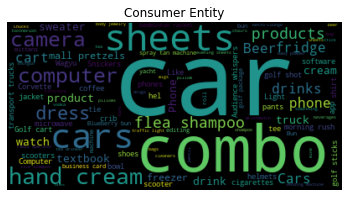

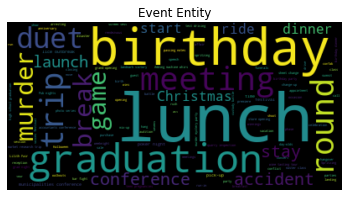

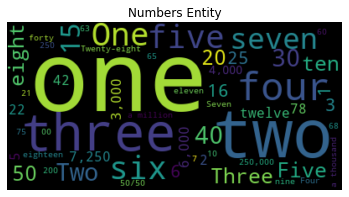

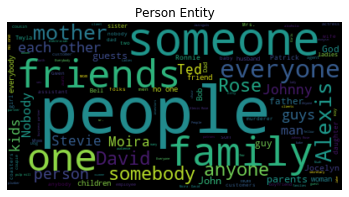

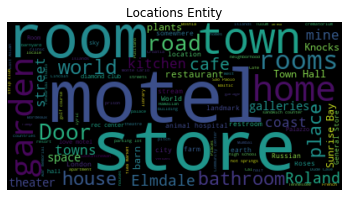

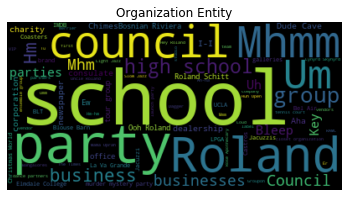

In [9]:
wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
a = []
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    
    
    
    for j in range(len(response2.tokens)):
        a.append((response2.tokens[j].part_of_speech))
    #    print('Syntax: {}'.format(response2[j]))    
    #print('Sentiment: {}'.format(response1))
    
    #print('Sentiment: {}'.format(response3))
print(a)

[tag: PUNCT
, tag: NOUN
number: PLURAL
proper: PROPER
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PUNCT
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PUNCT
, tag: DET
number: SINGULAR
, tag: VERB
mood: INDICATIVE
number: SINGULAR
person: THIRD
tense: PRESENT
, tag: ADV
, tag: ADJ
, tag: PUNCT
, tag: PRON
case: NOMINATIVE
number: SINGULAR
person: FIRST
, tag: VERB
mood: INDICATIVE
tense: PRESENT
, tag: PRON
case: GENITIVE
number: SINGULAR
person: FIRST
, tag: ADJ
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: ADV
, tag: VERB
mood: INDICATIVE
number: SINGULAR
person: THIRD
tense: PRESENT
, tag: PRON
case: GENITIVE
number: SINGULAR
person: FIRST
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: PUNCT
, tag: X
, tag: PUNCT
, tag: ADV
, tag: PUNCT
, tag: ADV
, tag: VERB
, tag: PRON
case: NOMINATIVE
n

In [13]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter 03x02 - The Throuple
/Arts & Entertainment


Classification of Letter 03x04 - Driving Test
/Autos & Vehicles/Vehicle Parts & Services


Classification of Letter 03x05 - Rooms by the Hour
/Arts & Entertainment


Classification of Letter 03x07 - General Store
/Arts & Entertainment/Humor


Classification of Letter 03x09 - The Affair
/Arts & Entertainment


Classification of Letter 03x10 - Sebastien Raine
/Arts & Entertainment


Classification of Letter 03x11 - Stop Saying Lice!
/Arts & Entertainment


Classification of Letter 03x12 - Friends & Family
/Arts & Entertainment


Classification of Letter 03x13 - Grad Night
/Arts & Entertainment


Classification of Letter 03x13 - Grad Night
/Hobbies & Leisure




In [14]:
lang = 'english'
count = 10


for i in range(len(corpus)):
    new_string = corpus[i].replace('.', '. ').strip()
    lsa = LsaSummarizer(Stemmer(lang))
    lsa.stop_words = get_stop_words(lang)
    parser = PlaintextParser.from_string(new_string, Tokenizer(lang))
    lsa_summary = lsa(parser.document, count)
    lsa_s = [str(sent) for sent in lsa_summary]
    summary = ' '.join(lsa_s)
    print('Summary of '+ txt_files[i][:-4])
    print(summary)
    print("")
    print("")
    

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (527) is lower than number of sentences (620). LSA algorithm may not work properly.



Summary of 03x01 - Opening Night
Well, Cal's doing big business, and since you two are sharing an office, uh, I thought you might wanna get in on some of it. Well, Johnny, you weren't exactly paying rent, and Cal's business is booming. (Car rumbles by) Um, okay, so I downloaded this app, basically so clients can schedule their appointments online. As a mother who once invested a great deal of time and money into her children, I, for one, stand by the request to extend the hours of the daycare. (Applause) One might think that an additional 30 minutes will have no impact, but you tell that to the mother whose manicurist just applied the wrong color, and must start all over again, or the father who got stuck in a mine! That extra half hour could be the difference between a child who gets picked up safely, and one who wanders the street, waiting for a dust-covered man to emerge from the darkness! Here's the issue, Mr.  Rose, I've been touring small towns, in an extensive market research tr

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (413) is lower than number of sentences (608). LSA algorithm may not work properly.



Summary of 03x02 - The Throuple
Oh my God, I literally told him to never come back here while you people were home. Yesterday it was this stabbing pain, but today it's more like a really intense throbbing. I'm not sharing a boyfriend, Stevie and I are both dating Jake, at the same time, like sexually evolved human beings. Don't wanna set a bad example for the rest of the motel staff. I took one tiny break to watch two episodes of "Scandal" with Mrs.  McCreary, while she waited for her dog! It's not normal for your father to be waiting tables at a rural sandwich counter. Okay, I'm starting to feel like I'm trapped in an Avril Lavigne lyric here. And while I not-so-secretly love Avril, and have paid very close attention to her battle with Lyme disease, um, I don't know why we're. If I'd known you didn't like the attention, I would've chosen to be alone with you, and not out in public, among the throngs of fans. ♪ (Crickets chirp) (Bell jingles) (Door shuts) Uh, what are you doing here?



c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (529) is lower than number of sentences (571). LSA algorithm may not work properly.



Summary of 03x03 - New Car
And if you'd just let me finish the pitch the way I planned it, things will be a lot more clear. No used car salesman is gonna cut you a deal dressed in archival designer silk. Alexis, I pay off my credit card bills two weeks in advance, what do you think? (Birds chirp) So the low energy bulbs you installed in the bathroom, I'm finding the light to be very harsh, and um. You see, I've got a closet full of suits, but uh, I don't wanna be taken advantage of because I'm overdressed, I need to look like I don't have money. A humble back story will disabuse this man of any notion we're too patrician. Yes, my poor 'usband, lost his job recently as a tennis pro, yes, at a public resort, that is, yeah. Mhmm, they looked at my fair skin, and my dazzling eyes, and they said, we'll make a pretty penny on that one, on the human black market, we will. (Birds chirp) Hey, so I'm headed out, and I will drop off the flea shampoo for Ms.  Warner's cat. (Engine idles, shuts off

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (483) is lower than number of sentences (506). LSA algorithm may not work properly.



Summary of 03x08 - Bad Review
(Birds chirp) Johnny: Listen, I've gotta step out for a bit, I told Stevie if she needed any help. Ooh, receptionist work is not my strong suit, that's more Alexis' bailiwick. Uh remind me, are you here for a photo series, or travel planning, or our newest service, closet organization? Ray: Your parents tell me you're very sporty, so Will, why don't you grab the paddle, and Theresa, a badminton racket? Well, you have to go back and tell Jocelyn that information was founded on practical experience in the field! Um, so I went to incorporate earlier today, and some guy basically told me that my business was a failure. So feel free to give me a call back, and I will be happy to walk you through it. Actually, I played them for a few friends of mine, I was at a birthday party, so there were a lot of people weighing in. When the Bangalores finally found Dagger, and gave him what he deserved, they threatened to burn down the motel, and leave my pregnant baby penni

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (530) is lower than number of sentences (585). LSA algorithm may not work properly.



Summary of 03x09 - The Affair
If airplane safety videos have taught me anything, David, it's that a mother puts her on own mask on first. Um, I'm sure you're very excited about all the new words you're learning in your high school intro to business course, but I think a more effective use of your time right now, would be to go and get the hand cream that I asked you to get ten minutes ago. (Phone hangs up) (Loud music and party chatter and laughter) - (Dial tone) - Okay. (Bell jungles over door) (Music plays quietly, dishes clank) Jocelyn! (Marker rasps) Um, David, I can swing by the store and help out after school, if you want. Um, if you really want the lip balm that bad there are a few things around the store that I could use your help with. He hasn't even asked for my phone number, which in my experience, means he's either newly married or he's gay. You know I've been thinking about all this and these products that Alexis was showing me yesterday were actually really impressive, I 

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (499) is lower than number of sentences (642). LSA algorithm may not work properly.



Summary of 03x10 - Sebastien Raine
I hate to play contrarian, David, but The Times and I, both consider Sebastien Raine a dear friend. And you ate all those mall pretzels, and watched "Bridget Jones's Diary" every day for a year. ♪ (Door opens) - (Dishes clatter) - (Motown music plays) Moira! - (Motown music plays) - (Dishes clank) (Bus whooshes by) So I have a quick little school form you to fill out. Haven't you noticed how Gwen circles the table with appetizers, constantly eying Bob. You know, come to think of it, those matching visors they're a little suspicious I don't want to believe this, But ah, I do miss my wristwatch. Listen now Ronnie, when you - when you have a good hand, you close your cards real quick. ♪ (Kicking thud) (Door opens) - Moira - Good morning, Sebastien. I was up all night evaluating our little project and I've come to the unfortunate conclusion that you may have misrepresented your intentions. With this work you will, once again, sit atop the summit of cultur

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (515) is lower than number of sentences (532). LSA algorithm may not work properly.



Summary of 03x11 - Stop Saying Lice!
I'm going to ignore that passive aggression, and instead, lean in to the fact that we're both working professionals now, and Mama Oprah would be very proud of us. Um, so you know what I think would be super fun, if we hung out at your place tonight. I don't think it works that way, but just so we're clear, you were wanting to have a platonic sleepover at my place would have nothing to do with the fact that your sister has lice? Now, I'm flattered beyond all reason, but I can't help but think the money could be better spent elsewhere, making much needed improvements to the roads, the streetlamps, the parks, the sidewalks, the traffic light. You know, I told David that the label was gonna be misleading, but he insisted. Sweetheart, I just thought having your own garden in town would make losing the theater less painful! Because I agree, our social predicament is not ideal, but we are both thriving professionally, and I feel like that needs to be celeb

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (449) is lower than number of sentences (454). LSA algorithm may not work properly.



Summary of 03x12 - Friends & Family
Did like an exclusive VIP guest list, and offered, you know, a friends and family discount as incentive. It's just, you know, I look to like Gwyneth who soft-launched the 'goop' newsletter and now it's a thriving lifestyle publication slash empire, and I have no idea what you're talking about, but it's up to you. We're inviting a select group of VIP's, and offering a 25 percent friends and family discount. David, we are happy to support this modest little vigil you're hosting but to hand out discounts before the store has even birthed it sounds a tad defeatist. (chuckles) I always felt something was missing in here and then it occurred to me that a lot of family-run businesses hang a portrait of the family in the workplace. I didn't order tuna melts, - but I don't have time to - Oh, by the way, I hope you don't mind, but I told a few people about your big store opening. (car rumbles) (footsteps thud) (door creaks open) Uh how many people did you tell